In [2]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import sys
import os
import glob


In [3]:
# glob does pattern matching on file structure
print(os.getcwd()+'/Storm Event Data/')

c:\Users\mattt\Documents\Classes\Data Mining\Project\Storm-Event-Data/Storm Event Data/


In [61]:
# glob does pattern matching on file structure
filelist = glob.glob(os.getcwd()+'/Storm Event Data/*details*.csv*')
df = pd.concat([pd.read_csv(f) for f in filelist]) 

C:\Users\mattt\AppData\Local\Temp\ipykernel_60668\1229720641.py:3: DtypeWarning: Columns (26,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([pd.read_csv(f) for f in filelist])
C:\Users\mattt\AppData\Local\Temp\ipykernel_60668\1229720641.py:3: DtypeWarning: Columns (26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([pd.read_csv(f) for f in filelist])
C:\Users\mattt\AppData\Local\Temp\ipykernel_60668\1229720641.py:3: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([pd.read_csv(f) for f in filelist])
C:\Users\mattt\AppData\Local\Temp\ipykernel_60668\1229720641.py:3: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([pd.read_csv(f) for f in filelist])
C:\Users\mattt\AppData\Local\Temp\ipykernel_60668\1229720641.py:3: DtypeWarning: Columns (29,34,35,37) have mi

In [6]:
df.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,195004,28,1445,195004,28,1445,NaN,10096222,OKLAHOMA,40.0,...,0.0,NaN,NaN,35.12,-99.20,35.17,-99.20,NaN,NaN,PUB
1,195004,29,1530,195004,29,1530,NaN,10120412,TEXAS,48.0,...,0.0,NaN,NaN,31.90,-98.60,31.73,-98.60,NaN,NaN,PUB
2,195007,5,1800,195007,5,1800,NaN,10104927,PENNSYLVANIA,42.0,...,0.0,NaN,NaN,40.58,-75.70,40.65,-75.47,NaN,NaN,PUB
3,195007,5,1830,195007,5,1830,NaN,10104928,PENNSYLVANIA,42.0,...,0.0,NaN,NaN,40.60,-76.75,NaN,NaN,NaN,NaN,PUB
4,195007,24,1440,195007,24,1440,NaN,10104929,PENNSYLVANIA,42.0,...,0.0,NaN,NaN,41.63,-79.68,NaN,NaN,NaN,NaN,PUB


In [7]:
df.info

<bound method DataFrame.info of        BEGIN_YEARMONTH  BEGIN_DAY  BEGIN_TIME  END_YEARMONTH  END_DAY  \
0               195004         28        1445         195004       28   
1               195004         29        1530         195004       29   
2               195007          5        1800         195007        5   
3               195007          5        1830         195007        5   
4               195007         24        1440         195007       24   
...                ...        ...         ...            ...      ...   
38104           202305          1         551         202305        1   
38105           202305          1         708         202305        1   
38106           202305          1         900         202305        1   
38107           202305          1         800         202305        1   
38108           202305         17        1150         202305       17   

       END_TIME  EPISODE_ID  EVENT_ID         STATE  STATE_FIPS  ...  \
0          1445    



There are missing values in a significant number of values missing from the event description fields. A lot of this is due to different event types only having data in select fields.

In [10]:
print(df.isna().value_counts())

BEGIN_YEARMONTH  BEGIN_DAY  BEGIN_TIME  END_YEARMONTH  END_DAY  END_TIME  EPISODE_ID  EVENT_ID  STATE  STATE_FIPS  YEAR   MONTH_NAME  EVENT_TYPE  CZ_TYPE  CZ_FIPS  CZ_NAME  WFO    BEGIN_DATE_TIME  CZ_TIMEZONE  END_DATE_TIME  INJURIES_DIRECT  INJURIES_INDIRECT  DEATHS_DIRECT  DEATHS_INDIRECT  DAMAGE_PROPERTY  DAMAGE_CROPS  SOURCE  MAGNITUDE  MAGNITUDE_TYPE  FLOOD_CAUSE  CATEGORY  TOR_F_SCALE  TOR_LENGTH  TOR_WIDTH  TOR_OTHER_WFO  TOR_OTHER_CZ_STATE  TOR_OTHER_CZ_FIPS  TOR_OTHER_CZ_NAME  BEGIN_RANGE  BEGIN_AZIMUTH  BEGIN_LOCATION  END_RANGE  END_AZIMUTH  END_LOCATION  BEGIN_LAT  BEGIN_LON  END_LAT  END_LON  EPISODE_NARRATIVE  EVENT_NARRATIVE  DATA_SOURCE
False            False      False       False          False    False     False       False     False  False       False  False       False       False    False    False    False  False            False        False          False            False              False          False            False            False         False   False  

In [14]:
for col in df:
    print(col)

BEGIN_YEARMONTH
BEGIN_DAY
BEGIN_TIME
END_YEARMONTH
END_DAY
END_TIME
EPISODE_ID
EVENT_ID
STATE
STATE_FIPS
YEAR
MONTH_NAME
EVENT_TYPE
CZ_TYPE
CZ_FIPS
CZ_NAME
WFO
BEGIN_DATE_TIME
CZ_TIMEZONE
END_DATE_TIME
INJURIES_DIRECT
INJURIES_INDIRECT
DEATHS_DIRECT
DEATHS_INDIRECT
DAMAGE_PROPERTY
DAMAGE_CROPS
SOURCE
MAGNITUDE
MAGNITUDE_TYPE
FLOOD_CAUSE
CATEGORY
TOR_F_SCALE
TOR_LENGTH
TOR_WIDTH
TOR_OTHER_WFO
TOR_OTHER_CZ_STATE
TOR_OTHER_CZ_FIPS
TOR_OTHER_CZ_NAME
BEGIN_RANGE
BEGIN_AZIMUTH
BEGIN_LOCATION
END_RANGE
END_AZIMUTH
END_LOCATION
BEGIN_LAT
BEGIN_LON
END_LAT
END_LON
EPISODE_NARRATIVE
EVENT_NARRATIVE
DATA_SOURCE


In [34]:
for col in df:
    print(col)
    print(df[col].unique())

BEGIN_YEARMONTH
[195004 195007 195008 195011 195009 195010 195006 195002 195003 195005
 195001 195012 195109 195106 195103 195105 195107 195104 195102 195108
 195110 195101 195112 195111 195203 195206 195201 195204 195207 195208
 195205 195212 195202 195211 195209 195312 195305 195303 195304 195306
 195309 195311 195302 195308 195307 195301 195310 195403 195404 195405
 195408 195409 195410 195402 195406 195407 195401 195411 195412 195509
 195505 195506 195507 195510 195504 195511 195503 195508 195501 195502
 195512 195607 195602 195603 195604 195605 195606 195608 195612 195610
 195609 195611 195601 195707 195706 195711 195705 195703 195704 195702
 195708 195709 195712 195701 195710 195806 195808 195805 195809 195807
 195804 195802 195810 195801 195811 195803 195812 195910 195904 195905
 195909 195908 195907 195906 195903 195911 195912 195902 195901 196007
 196006 196003 196005 196004 196008 196002 196001 196009 196010 196011
 196012 196104 196108 196106 196107 196105 196103 196111 1961

70


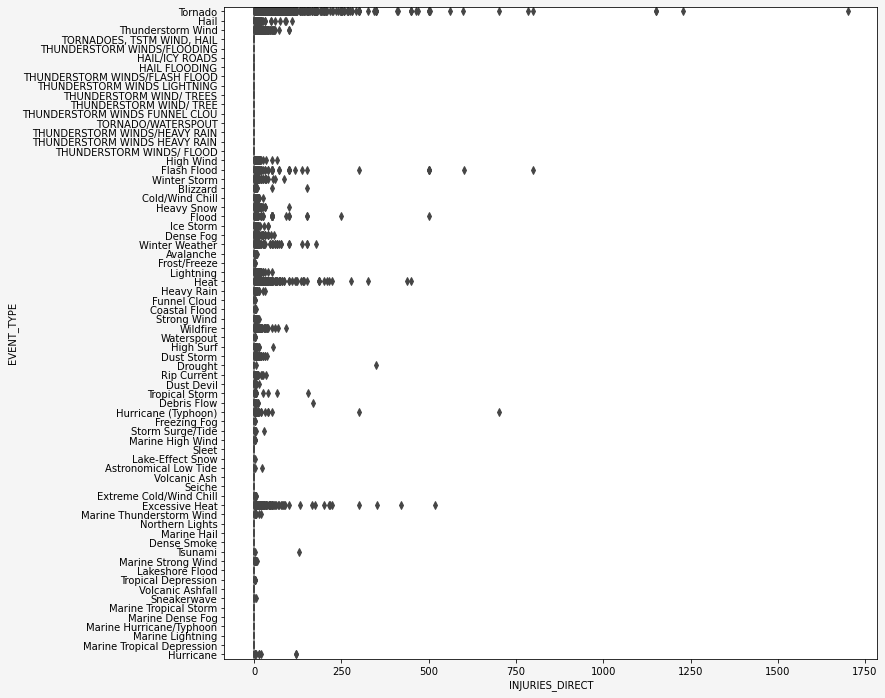

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.boxplot(data=df, x='INJURIES_DIRECT',y='EVENT_TYPE')
g.figure.set_facecolor("whitesmoke")
g.figure.set_size_inches(11.7, 12)
print(len(df['EVENT_TYPE'].unique()))

Percent of events causing injuries: 0.721343350596764
Total # of Injuries: 13222
2197      450
1150      450
9104      450
2783      450
2796      463
18350     468
1554      500
10434     500
10921     500
10028     500
46406     500
1831      500
17694     500
2563      500
10460     500
342       504
57237     519
2242      560
342       597
10457     600
73092     700
40295     700
174       785
4982      800
71565     800
37524    1150
3040     1150
128      1228
4188     1700
69203    2400
Name: INJURIES_TOTAL, dtype: int64


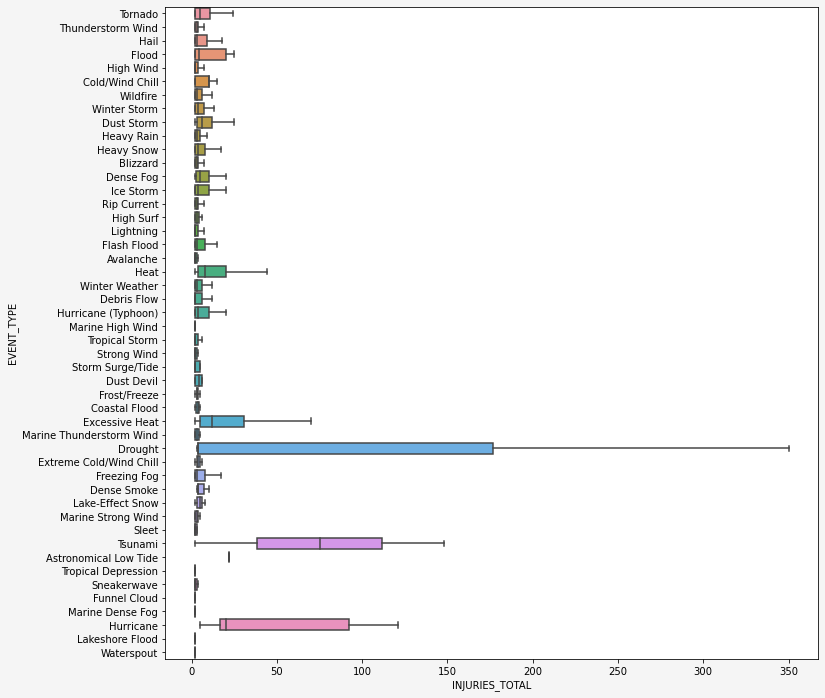

In [147]:
df['INJURIES_TOTAL'] = df['INJURIES_DIRECT'] + df['INJURIES_INDIRECT']

bins = [-1,1,np.inf]
names = ['NO','YES']
df['CAUSED_INJURIES'] = pd.cut(df['INJURIES_TOTAL'],bins,labels=names)
vals = df['CAUSED_INJURIES'].value_counts()
print("Percent of events causing injuries:",vals[1]/(vals[0]+vals[1])*100)
print("Total # of Injuries:", vals[1])

df_injuries = df[df['CAUSED_INJURIES'] == 'YES']
print(df_injuries['INJURIES_TOTAL'].sort_values().tail(30))

# Turned off fliers to make plot readable - note that the more common events have very big outliers (ie 2500 deaths), making up a 
# portion of the total injuries
g = sns.boxplot(data=df_injuries, x='INJURIES_TOTAL',y='EVENT_TYPE',showfliers=False)
g.figure.set_facecolor("whitesmoke")
g.figure.set_size_inches(11.7, 12)


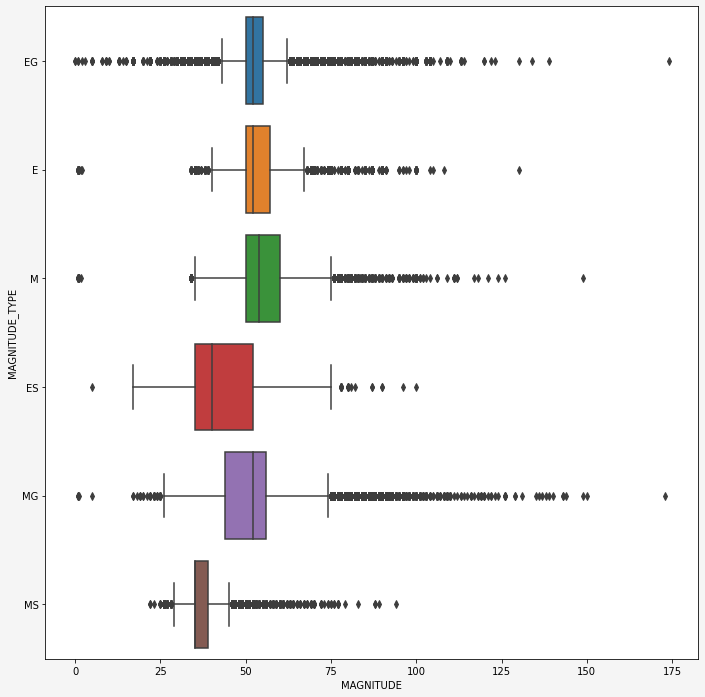

In [35]:
import seaborn as sns
g = sns.boxplot(data=df, x='MAGNITUDE',y='MAGNITUDE_TYPE')
g.figure.set_facecolor("whitesmoke")
g.figure.set_size_inches(11.7, 12)

In [133]:
import seaborn as sns
g = sns.boxplot(data=df, x='DAMAGE_PROPERTY',y='EVENT_TYPE')
g.figure.set_facecolor("whitesmoke")
g.figure.set_size_inches(11.7, 12)

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [108]:
df['DAMAGE_CROPS_NUMERIC'] = df['DAMAGE_CROPS'].astype(str).fillna('0.0')

In [90]:
float(df['DAMAGE_CROPS_NUMERIC'].iloc[1103333][0:-1])*1000

0.0

In [110]:
def damage_to_numeric(row,col):
    # Need to check for more signififiers - may be numeric suffixes
    val_dict = {'h':100,'H':100, 'k':1000,'K':1000,'M':1000000,'B':1000000000, 'T': 1000000000000, '?':1}
    if row[col] == 'nan' or row[col] == '':
        return 0.0
    elif row[col][-1] in val_dict:
        if row[col][0:-1] == '':
            return 0.0
        else:
            return float(row[col][0:-1])*val_dict[row[col][-1]]
    else:
        return float(row[col])
    
col = 'DAMAGE_CROPS_NUMERIC'
df['DAMAGE_CROPS_NUMERIC'] = df.apply(lambda x: damage_to_numeric(x,col),axis=1).astype('float64')

In [137]:
df['DAMAGE_PROPERTY_NUMERIC'] = df['DAMAGE_PROPERTY'].astype(str).fillna('0.0')
print(df['DAMAGE_PROPERTY_NUMERIC'].value_counts().to_markdown())
# col = 'DAMAGE_PROPERTY_NUMERIC'
# df['DAMAGE_PROPERTY_NUMERIC'] = df.apply(lambda x: damage_to_numeric(x,col),axis=1).astype('float64')

|                    |   DAMAGE_PROPERTY_NUMERIC |
|:-------------------|--------------------------:|
| 0.00K              |                    632811 |
| nan                |                    572724 |
| 0                  |                    200035 |
| 1.00K              |                     32180 |
| 5.00K              |                     29430 |
| 10.00K             |                     25109 |
| 5K                 |                     23324 |
| 2.00K              |                     21274 |
| 0K                 |                     17641 |
| 10K                |                     15527 |
| 25K                |                     14240 |
| 3.00K              |                     11901 |
| 1K                 |                     11062 |
| 2K                 |                     10842 |
| 50.00K             |                     10555 |
| 25.00K             |                     10050 |
| 50K                |                      9567 |
| 20.00K             |         

In [125]:
#print(df['DAMAGE_CROPS_NUMERIC'].value_counts().to_markdown())
df['DAMAGE_CROPS_NUMERIC'] = df['DAMAGE_CROPS_NUMERIC'].astype('float64')
df['DAMAGE_CROPS_NUMERIC'].sort_values().tail(30)

44212    1.000000e+06
47483    1.000000e+06
118      1.000000e+06
25090    1.500000e+06
21412    2.000000e+06
25387    2.500000e+06
66839    2.500000e+06
26222    2.500000e+06
31389    3.000000e+06
19959    3.000000e+06
46361    3.500000e+06
26226    3.500000e+06
26224    3.500000e+06
26016    4.000000e+06
39670    4.000000e+06
28462    4.000000e+06
48792    5.000000e+06
8983     5.000000e+06
47498    5.000000e+06
26225    6.500000e+06
58057    9.000000e+06
58056    9.000000e+06
58055    9.000000e+06
58054    9.000000e+06
58052    9.000000e+06
58053    9.000000e+06
70784    1.000000e+08
6140     1.000000e+09
54115    1.050000e+09
5351     1.500000e+09
Name: DAMAGE_CROPS_NUMERIC, dtype: float64

AttributeError: 'tuple' object has no attribute 'figure'

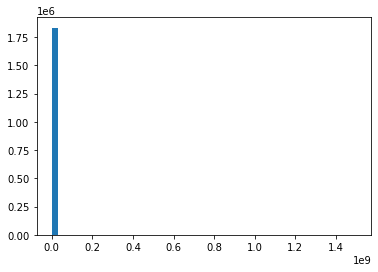

In [135]:
g3 = plt.hist(x=df['DAMAGE_CROPS_NUMERIC'],bins=50)
g3.figure.set_facecolor("whitesmoke")
g3.axes.set_facecolor("ghostwhite")

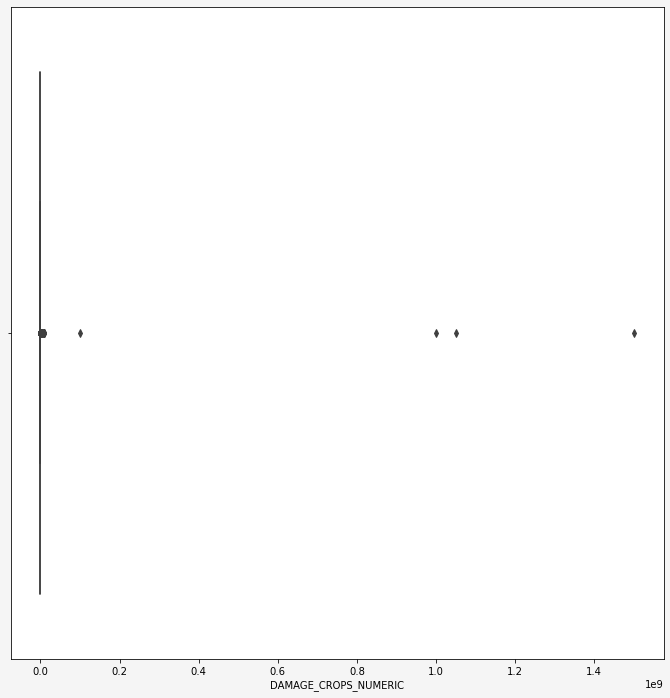

In [129]:
g = sns.boxplot(x=df['DAMAGE_CROPS_NUMERIC'])
g.figure.set_facecolor("whitesmoke")
g.figure.set_size_inches(11.7, 12)